In [2]:
import sys; sys.path.append("..")
from epi_model import *

In [2]:
a = temporalNetwork.load('high school').range(1,2)

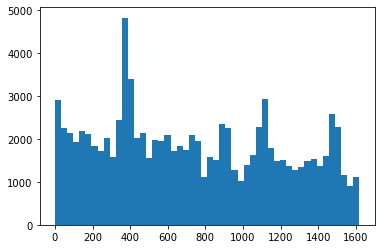

In [3]:
plt.hist([t for t,u,v in a.edgelist], bins=50);

In [4]:
[(t,u,v) for t,u,v in a.edgelist if t > 2500][:5]

[]

In [5]:
[(t,u,v) for t,u,v in a.edgelist][:5]

[(0, 640, 874), (0, 874, 640), (0, 376, 513), (0, 513, 376), (0, 20, 513)]

In [6]:
[(t,u,v) for t,u,v in a.edgelist if t > 3000][:5]

[]

In [7]:
ccc = a.node_attr['class']

classes = {
    c: [k for k,v in ccc.items() if v==c]
    for c in set(ccc.values())
}

In [8]:
css = a.node_attr['class']

In [9]:
nds = sorted(a.node_attr['class'])

In [10]:
class_map = a.node_attr['class']

In [11]:
C_DIST = 3

In [12]:
wt = Counter()
wt += Counter(u for t,u,v in a.edgelist)
wt += Counter(v for t,u,v in a.edgelist)

In [13]:
pos = {}

wts3 = Counter()

for i,c in enumerate(sorted(classes)):
    gnodes = [ k for k,v in class_map.items() if v==c ]
    
    G = nx.Graph()
    
    wts = Counter([(u,v) for t,u,v in a.edgelist if (u in gnodes and v in gnodes)])
    wts2 = Counter([u for t,u,v in a.edgelist if (u in gnodes and v in gnodes)])
    wts2 += Counter([v for t,u,v in a.edgelist if (u in gnodes and v in gnodes)])
    
    #G.add_nodes_from([k for k in gnodes if wts2[k] > 0])
    G.add_nodes_from({k for k in gnodes if wt[k]})
    G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])
    pos_class = nx.spring_layout(G, k=0.5)
    
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
    #shift_v = np.array([C_DIST,0]) * i
    
    x_mx, x_mn = max(v[0] for v in pos_class.values()), min(v[0] for v in pos_class.values())
    y_mx, y_mn = max(v[1] for v in pos_class.values()), min(v[1] for v in pos_class.values())
    
    print(x_mn, x_mx, y_mn, y_mx, c)
    if c == 'MP*2':
        print(pos_class)

    for k,v in pos_class.items():
        v[0] = (v[0] - x_mn) / ((x_mx-x_mn)/2) + -1
        v[1] = (v[1] - y_mn) / ((y_mx-y_mn)/2) + -1
        
        pos[k] = v*0.5 + shift_v

-0.5249050423445304 0.5434709900068375 -1.0 0.44521182729580955 2BIO1
-0.9999999999999999 0.6290831525668911 -0.6757006634646029 0.6810756092998902 2BIO2
-0.7529319833246025 0.8004259099463852 -1.0 0.7030961731802727 2BIO3
-0.9999999999999999 0.4930033072630362 -0.6320150814317957 0.6460540446414461 MP
-0.8454807109777119 0.765628380514458 -1.0 0.7000496569565038 MP*1
-0.581761565585744 0.6051931146818711 -0.5894510646104915 1.0 MP*2
{1412: array([0.00218757, 0.29766082]), 1543: array([-0.22042563, -0.33571743]), 1805: array([0.35906872, 0.0175586 ]), 1423: array([-0.18148911, -0.08822504]), 1295: array([0.13972946, 0.25430961]), 1819: array([-0.04112959, -0.44868736]), 1828: array([0.26332478, 0.02719418]), 1320: array([-0.4236    ,  0.10124071]), 1067: array([-0.07663209, -0.09521354]), 1324: array([ 0.03939852, -0.10350869]), 1201: array([ 0.08544548, -0.03860831]), 1332: array([0.21607036, 0.19218777]), 1204: array([-0.25891432,  0.03910152]), 1336: array([-0.20335181,  0.09096063]

In [14]:
len([x for x in a.edgelist if css[x[1]]==css[x[2]]])

88522

In [15]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in a.edgelist])
G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])
#G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts if a.node_attr['class'][u]==a.node_attr['class'][v]])

In [16]:
sum( k not in G.nodes for k,v in a.node_attr['class'].items() if v == 'MP*2' )

1

In [17]:
CUTOFF = 10 # 15 segments * 20s = 5 minutes

In [18]:
from matplotlib.patches import ConnectionStyle

In [19]:
#{k for k,v in a.node_attr['class'].items() if v == 'MP*2'}.difference({z for z in G.nodes if a.node_attr['class'][z] == 'MP*2'})

In [42]:
plt.cm.

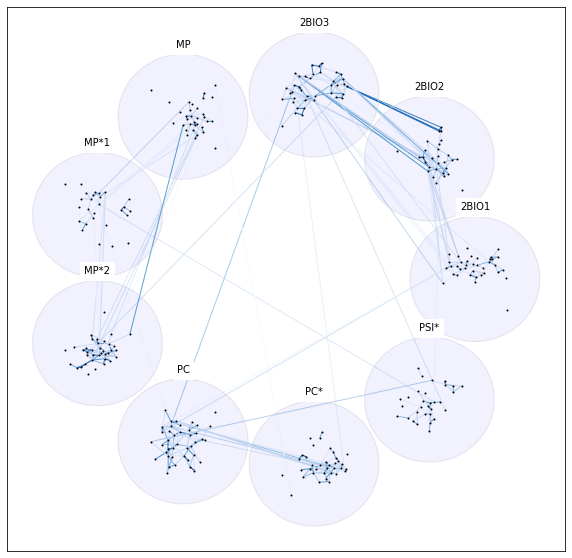

In [47]:
fig,ax = plt.subplots(figsize=(10,10))

#edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= CUTOFF])
#edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if a.node_attr['class'][e1]==a.node_attr['class'][e2]])

weights = np.array(weights)
weights = weights / np.max(weights)

weights = np.log(weights)
weights = weights + -np.min(weights)
weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

for i,c in enumerate(sorted(classes)):
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
        
    # draw the circles
    circ = plt.Circle(shift_v, 1, color='b', alpha=0.05)
    circ2 = plt.Circle(shift_v, 1, fc='none', ec='#DDD', alpha=0.5)
    plt.text( shift_v[0], shift_v[1]+1.1, c, horizontalalignment='center', backgroundcolor='#FFF' )
    ax.add_patch(circ)
    ax.add_patch(circ2)
    
    
arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
#plt.scatter(x,y)
    
plt.savefig('classes_diagram_limited.png', dpi=300)

In [5]:
from importlib import reload

In [1]:
from network_diagram import network_diagram

In [ ]:
reload(network_diagram)

In [8]:
import episim

In [ ]:
animate.anim

In [3]:
hs = temporalNetwork.load('high school2')

# the other one

In [242]:
b = temporalNetwork.load('high school2')

In [243]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in b.edgelist])
G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])
#G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts if a.node_attr['class'][u]==a.node_attr['class'][v]])

In [244]:
list(b.node_attr)

['role']

In [245]:
ccc = b.node_attr['role']

classes = {
    c: [k for k,v in ccc.items() if v==c]
    for c in set(ccc.values())
}

In [246]:
css = b.node_attr['role']

In [247]:
nds = sorted(b.node_attr['role'])

In [248]:
class_map = b.node_attr['role']

In [249]:
C_DIST = 3

In [250]:
q8 = np.quantile( np.array(list(wts.values())), 0.8 )

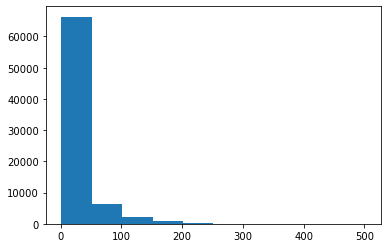

In [251]:
plt.hist( list(wts.values()) );

In [311]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in b.edgelist])
Ns = Counter([u for t,u,v in b.edgelist])
G.add_nodes_from(list(Ns))
G.add_weighted_edges_from([(u,v,w) for (u,v),w in wts.items() if w>=q8])

In [312]:
len(nds)

790

In [313]:
len(pos)

310

In [314]:
def doit(x):
    if x < 0:
        return -np.power(-x, 0.2)
    else: return np.power(x, 0.2)

In [315]:
pos_l = {
    k: [doit(v[0]), doit(v[1])]
    for k,v in pos.items()
}

(array([45., 44., 45., 44., 44., 45., 44., 45., 44., 45.]),
 array([  0. ,  44.4,  88.8, 133.2, 177.6, 222. , 266.4, 310.8, 355.2,
        399.6, 444. ]),
 <a list of 10 Patch objects>)

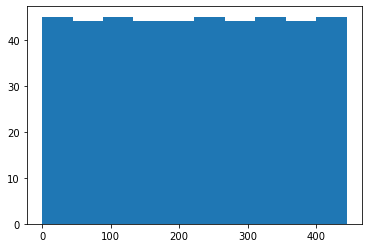

In [316]:
plt.hist(weights)

In [317]:
pos_x = np.argsort( [x for x,y in pos_spring.values()] )
pos_y = np.argsort( [y for x,y in pos_spring.values()] )

In [318]:
pos_sorted = {k:[pos_x[i],pos_y[i]] for i,k in enumerate(pos_spring.keys())}
# really didn't work. blows apart X and Y correlations. or I did it wrong

In [319]:
pos_start = {}
teach_i = 0
teach_N = Counter(b.node_attr['role'].values())['teacher']

fixed = []

for k in G.nodes:
    if k not in b.node_attr['role']:
        pos_start[k] = [random(), random()]        
    else:
        role = b.node_attr['role'][k]
        if role != 'teacher':
            pos_start[k] = [random(), random()]
        else:
            pos_start[k] = [2*teach_i/teach_N - 1 + 1/(teach_N/2), 0]
            teach_i += 1
            fixed.append(k)
        
pos_spring_mod = nx.spring_layout(G, k=0.5, pos=pos_start, fixed=fixed)

In [320]:
teach_i

72

In [321]:
pos = pos_spring_mod

In [322]:
CUTOFF = 150

In [323]:
Counter(b.node_attr['role'].values())

Counter({'student': 656, 'staff': 56, 'teacher': 73, 'other': 5})

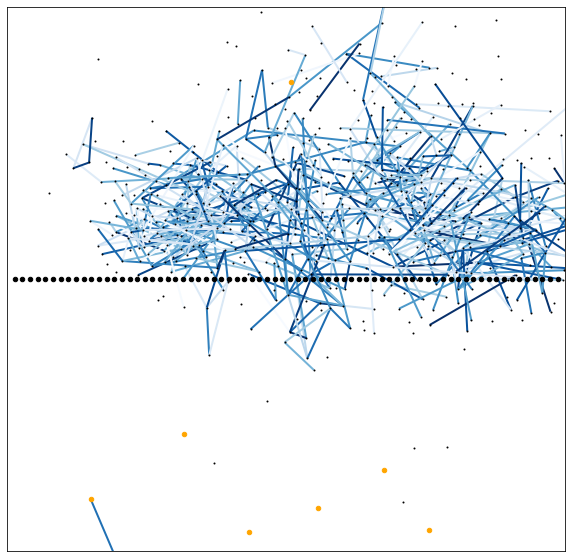

In [324]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

nx.draw_networkx_nodes(G, pos, node_size=20, node_color='black', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'teacher'])
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)

arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=2, edge_cmap=plt.cm.Blues, alpha=1)
    
plt.savefig('classes_diagram_limited.2.png', dpi=300)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

In [325]:
pos = pos_spring

In [349]:
CUTOFF = 180
CUTOFF2 = 80

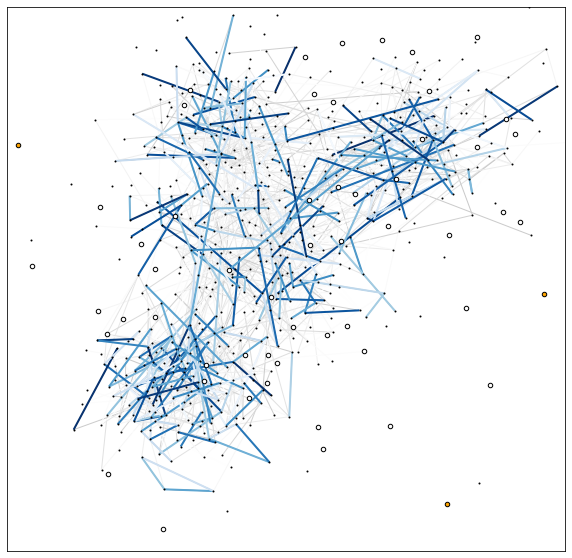

In [350]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

nx.draw_networkx_nodes(G, pos, node_size=20, node_color='white', edgecolors='black', linewidths=1, nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'teacher'])
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', edgecolors='black', linewidths=1, nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 110])
nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=1)

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= CUTOFF2 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= CUTOFF2 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)

arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=2, edge_cmap=plt.cm.Blues, alpha=1)
    
plt.xlim((-0.3, 0.35))
plt.ylim((-0.45, 0.3))

plt.savefig('classes_diagram_limited.2.png', dpi=300)
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

# same network for hs1

In [281]:
a = temporalNetwork.load('high school').range(1,2)

In [282]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in a.edgelist])
G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])
#G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts if a.node_attr['class'][u]==a.node_attr['class'][v]])

In [283]:
pos = nx.spring_layout(G, k=0.5)

In [294]:
CUTOFF = 15

In [291]:
classes

['2BIO1', '2BIO2', '2BIO3', 'MP', 'MP*1', 'MP*2', 'PC', 'PC*', 'PSI*']

In [292]:
colors = ['blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'yellow', 'yellow', 'yellow']
colors_gr = ['#777', '#888', '#999', '#AAA', '#BBB', '#CCC', '#DDD', '#EEE', '#FFF']
classes = sorted(set(a.node_attr['class'].values()))
len(classes), len(colors)

(9, 9)

In [299]:
len(edges)

445

In [300]:
len(edgesA)

2573

In [303]:
len(edgesA)

2573

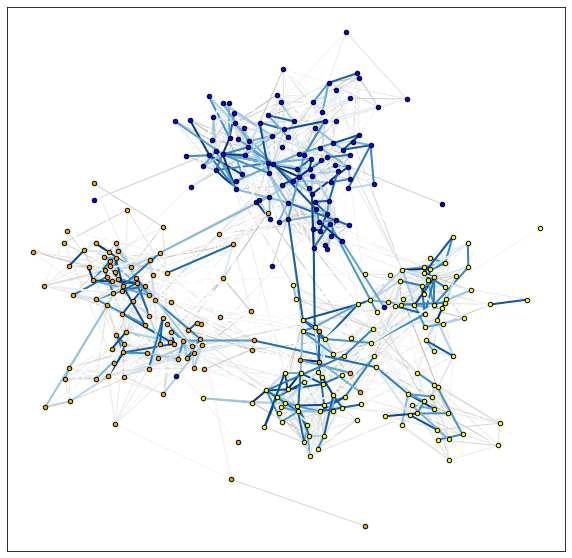

In [310]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

for ci,c in enumerate(colors):
    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
    #col = plt.cm.gray(ci)
    #col = [list(col)]
    
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color=colors[ci], nodelist=class_nodes, linewidths=1, edgecolors='black')
#nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])

nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=1)
nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=2, edge_cmap=plt.cm.Blues, alpha=1)

    
#plt.xlim((-0.3, 0.35))
#plt.ylim((-0.45, 0.3))

plt.savefig('classes_diagram_limited.1.png', dpi=300)
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

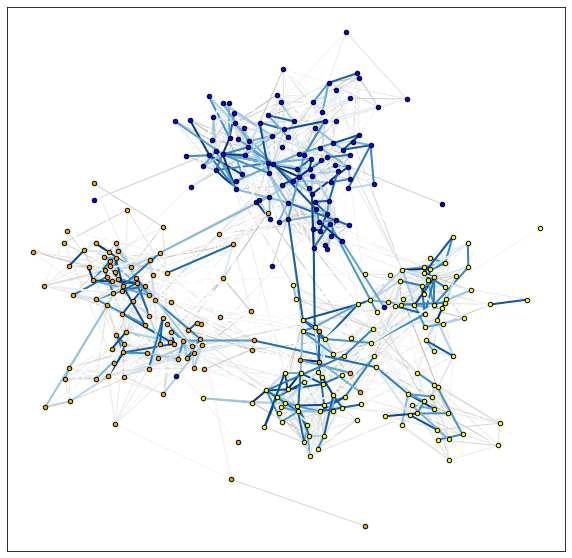

In [310]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

for ci,c in enumerate(colors):
    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
    #col = plt.cm.gray(ci)
    #col = [list(col)]
    
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color=colors[ci], nodelist=class_nodes, linewidths=1, edgecolors='black')
#nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])

nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=1)
nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=2, edge_cmap=plt.cm.Blues, alpha=1)

    
#plt.xlim((-0.3, 0.35))
#plt.ylim((-0.45, 0.3))

plt.savefig('classes_diagram_limited.1.png', dpi=300)
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

# synthetic network

In [3]:
with open("SEIRS+_graph.pickle", 'rb') as inf:
    G = pickle.load(inf)

In [58]:
pos = nx.spring_layout(G, k=0.5, iterations=500)

In [59]:
CUTOFF = 0

In [60]:
edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF]);

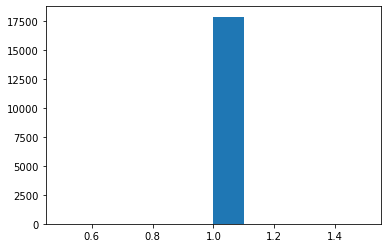

In [61]:
plt.hist(weights);

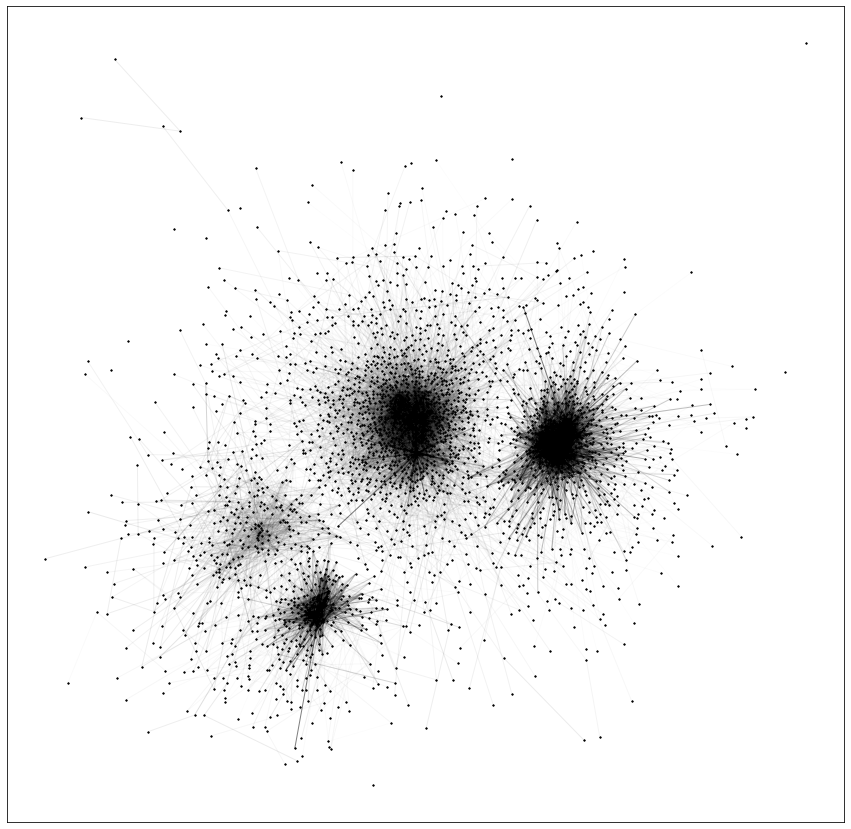

In [92]:
fig,ax = plt.subplots(figsize=(15,15))

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

#for ci,c in enumerate(colors):
#    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
    #col = plt.cm.gray(ci)
    #col = [list(col)]
    
#nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


#edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
#nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
degs = nx.degree(G)
weights = [(0,0,0,1/max(degs[i], degs[j])) for i,j in G.edges]

nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1)
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

    
#plt.xlim((-0.3, 0.35))
#plt.ylim((-0.45, 0.3))

plt.savefig('classes_diagram_limited.synthetic.png', dpi=300)
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

In [31]:
list(nbs)

[62, 228, 1832]

In [111]:
import seaborn as sb

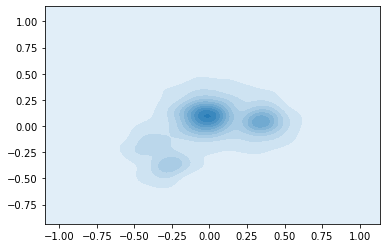

Got 11 neighbors, and G_lim now has 12 nodes
Got 10 neighbors, and G_lim now has 11 nodes
Got 30 neighbors, and G_lim now has 31 nodes
Got 64 neighbors, and G_lim now has 65 nodes
Got 28 neighbors, and G_lim now has 29 nodes
Got 14 neighbors, and G_lim now has 15 nodes


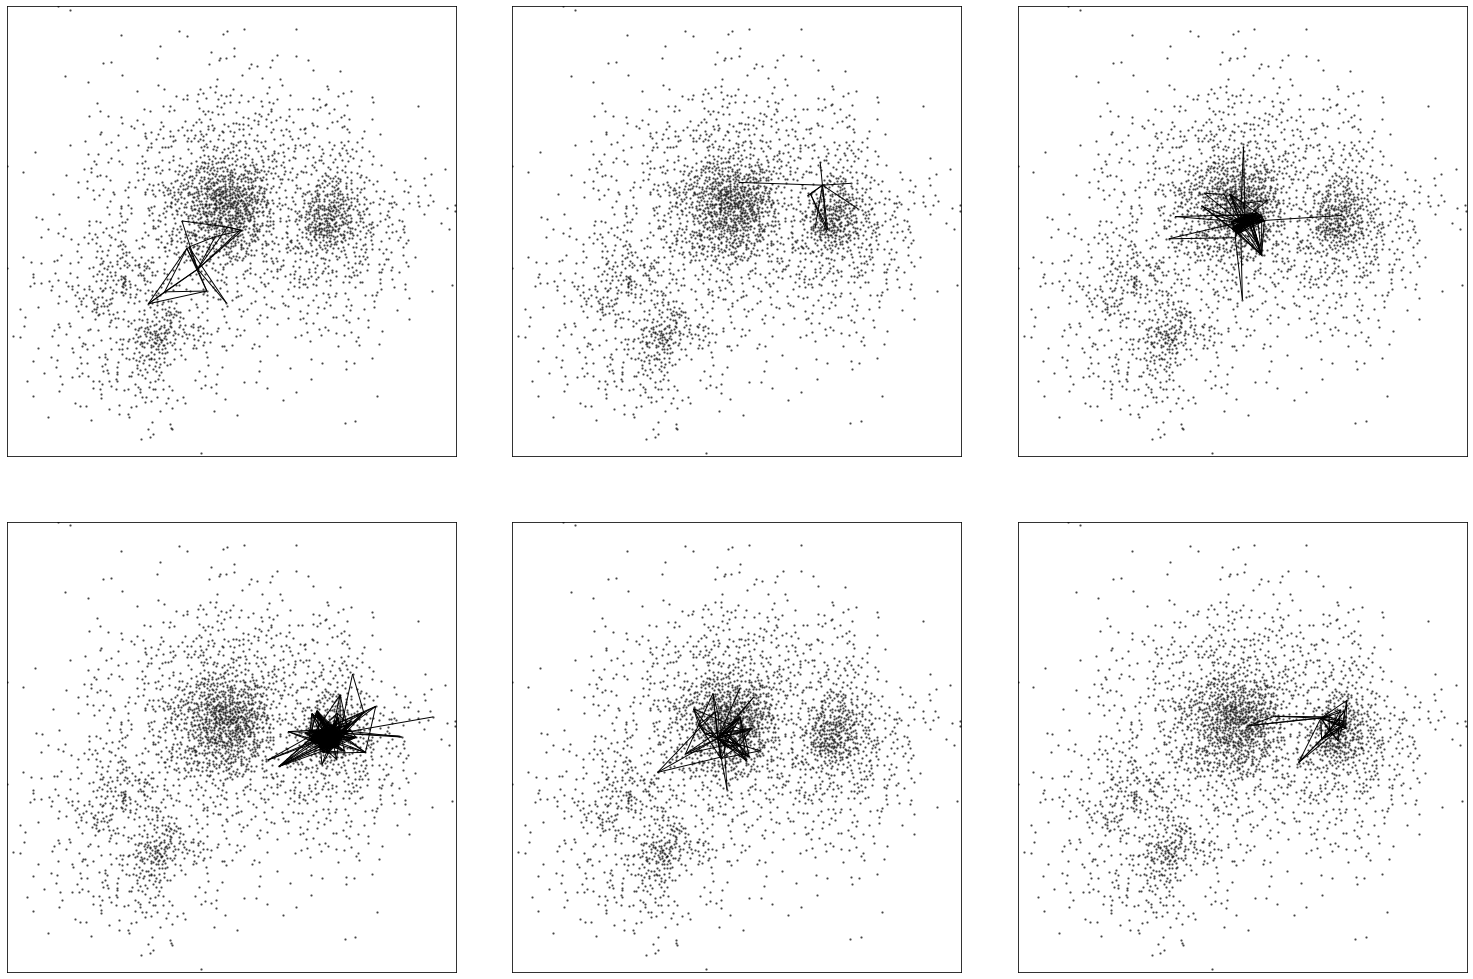

In [120]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')


    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    #nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=40, node_color='white', edgecolors='black', linewidths=1)
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=1, alpha=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    plt.xlim(-0.8, 0.8)
    plt.ylim(-0.8, 0.8)

plt.savefig('classes_diagram_limited.synthetic.ego.png', dpi=300)

Got 48 neighbors, and G_lim now has 49 nodes
Got 19 neighbors, and G_lim now has 20 nodes
Got 38 neighbors, and G_lim now has 39 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 19 neighbors, and G_lim now has 20 nodes
Got 39 neighbors, and G_lim now has 40 nodes


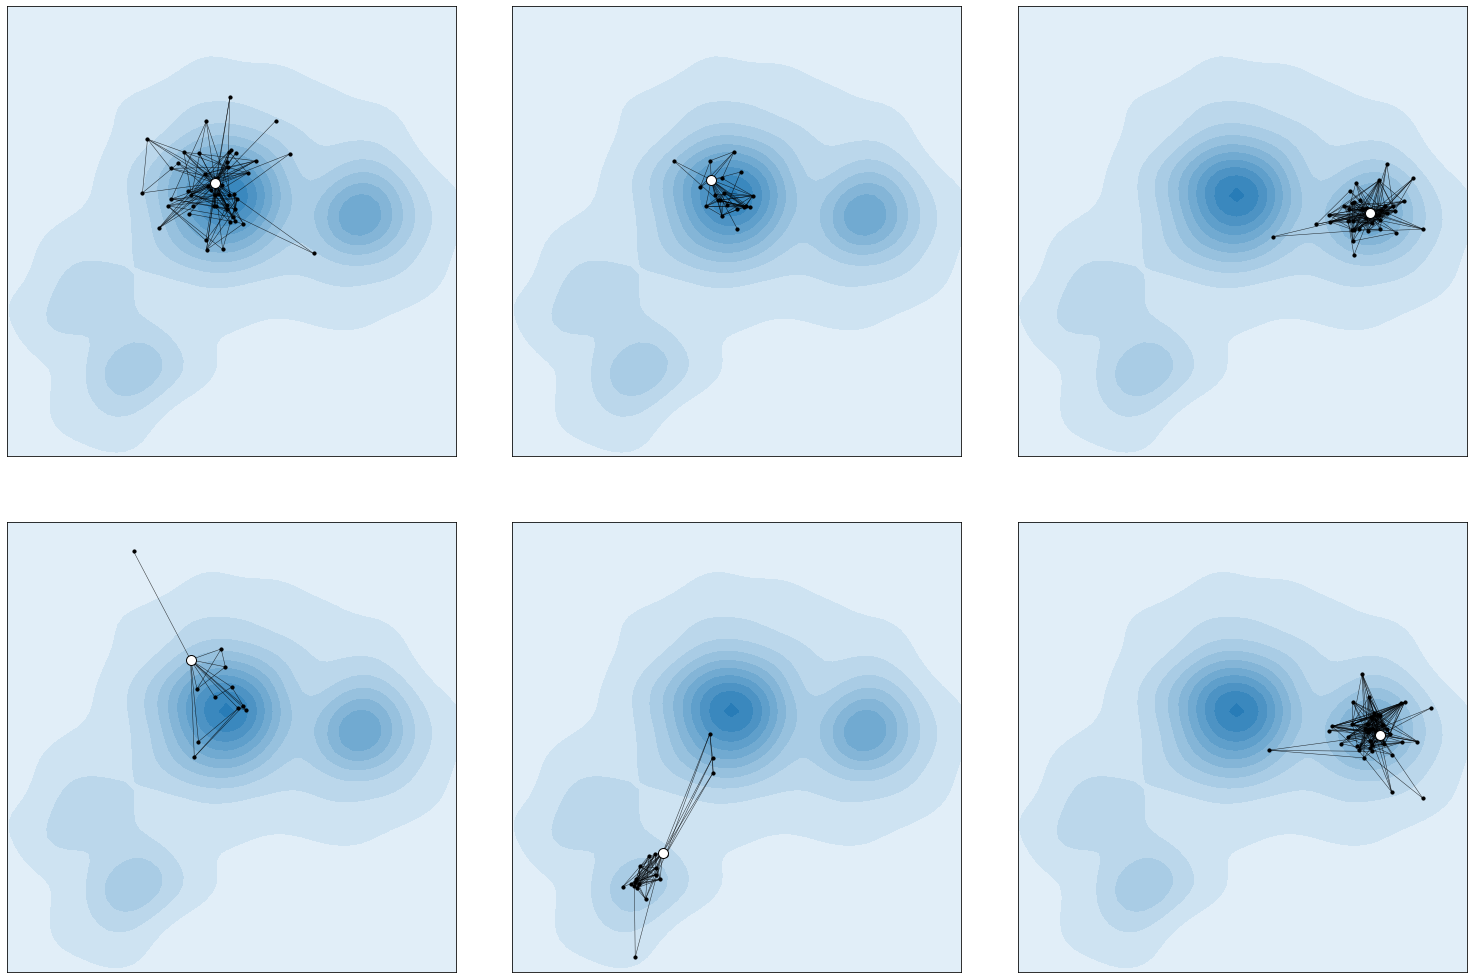

In [131]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')

    sb.kdeplot(
        [x[0] for x in pos.values()],
        [x[1] for x in pos.values()],
        shade=True, #bw_adjust=.5
        n_levels=10
    )

    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    #nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=0.5, alpha=0.8)
    nx.draw_networkx_nodes(G_lim, pos, nodelist=nbs, node_size=10, node_color='black')
    
    nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=100, node_color='white', edgecolors='black', linewidths=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    plt.xlim(-0.6, 0.6)
    plt.ylim(-0.6, 0.6)
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('classes_diagram_limited.synthetic.ego.density.png', dpi=300)

Got 23 neighbors, and G_lim now has 24 nodes
Got 14 neighbors, and G_lim now has 15 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 30 neighbors, and G_lim now has 31 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 69 neighbors, and G_lim now has 70 nodes


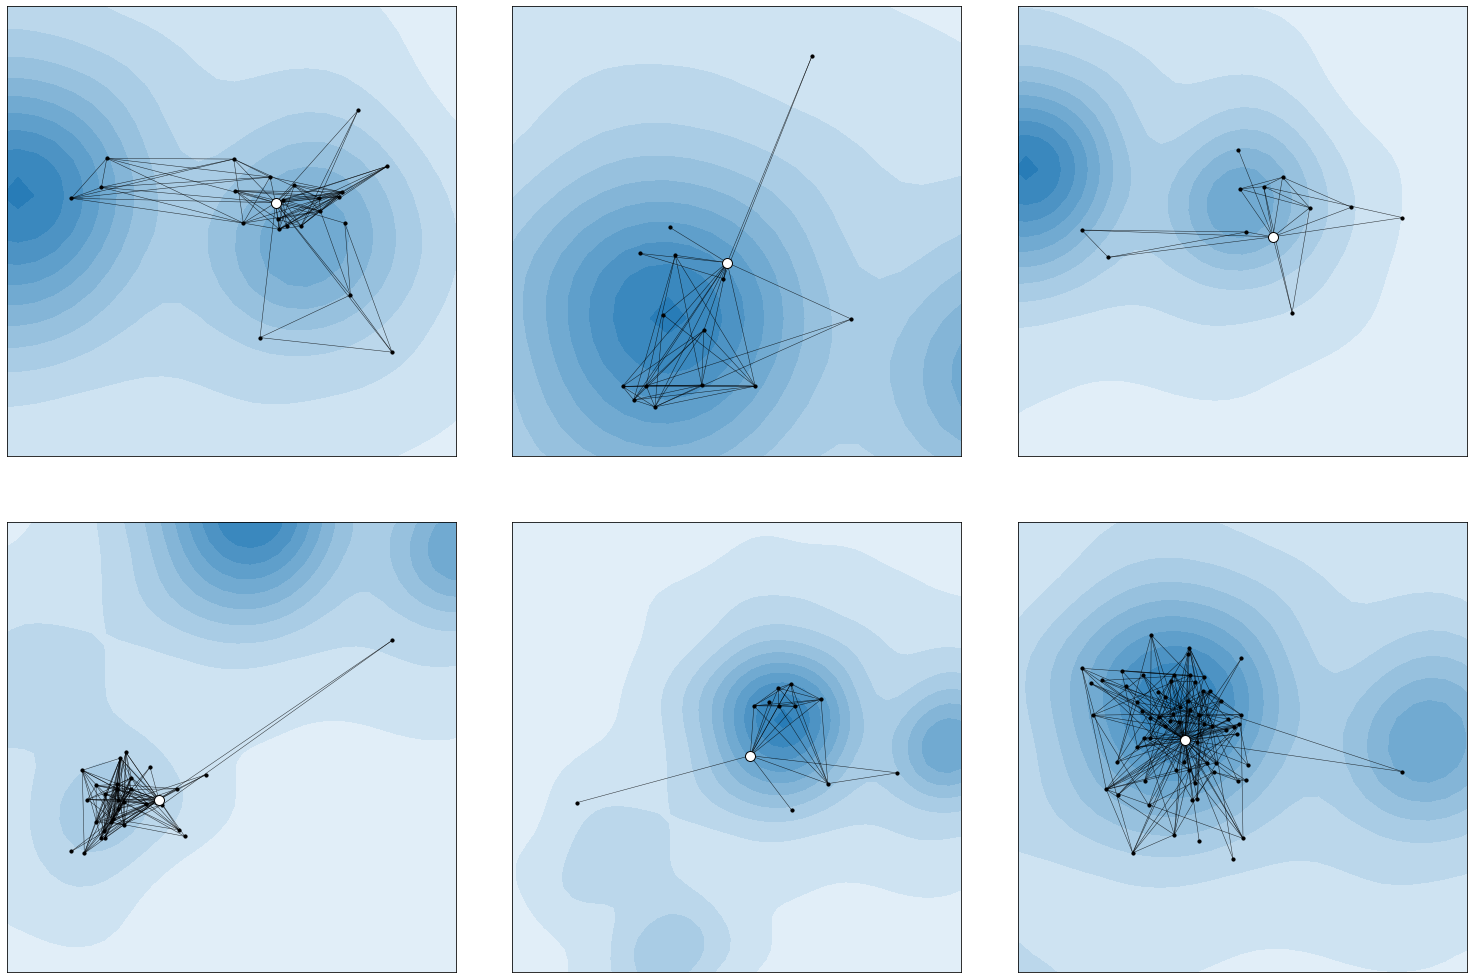

In [135]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')

    sb.kdeplot(
        [x[0] for x in pos.values()],
        [x[1] for x in pos.values()],
        shade=True, #bw_adjust=.5
        n_levels=10
    )

    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    #nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=0.5, alpha=0.8)
    nx.draw_networkx_nodes(G_lim, pos, nodelist=nbs, node_size=10, node_color='black')
    
    nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=100, node_color='white', edgecolors='black', linewidths=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    oxlim = plt.xlim()
    oxr = oxlim[1]-oxlim[0]
    oylim = plt.ylim()
    oyr = oylim[1]-oylim[0]
    
    xmn = min([x[0] for k,x in pos.items() if k in nbs])
    xmx = max([x[0] for k,x in pos.items() if k in nbs])
    xdif = xmx-xmn
    
    ymn = min([x[1] for k,x in pos.items() if k in nbs])
    ymx = max([x[1] for k,x in pos.items() if k in nbs])
    ydif = ymx-ymn
    
    xmn -= xdif*0.2
    xmx += xdif*0.2
    ymn -= xdif*0.2
    ymx += xdif*0.2
    
    xr = xmx-xmn
    yr = ymx-ymn
    
    if oyr / oxr > yr / xr:
        yr = xr * oyr / oxr
        
        ymean = (ymn + ymx)/2
        ymn = ymean - yr/2
        ymx = ymean + yr/2
    else:
        xr = yr * oxr / oyr
        xmean = (xmn + xmx)/2
        xmn = xmean - xr/2
        xmx = xmean + xr/2
    
    plt.xlim(xmn, xmx)
    plt.ylim(ymn, ymx)
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('classes_diagram_limited.synthetic.ego.density.png', dpi=300)

# some other bullshit

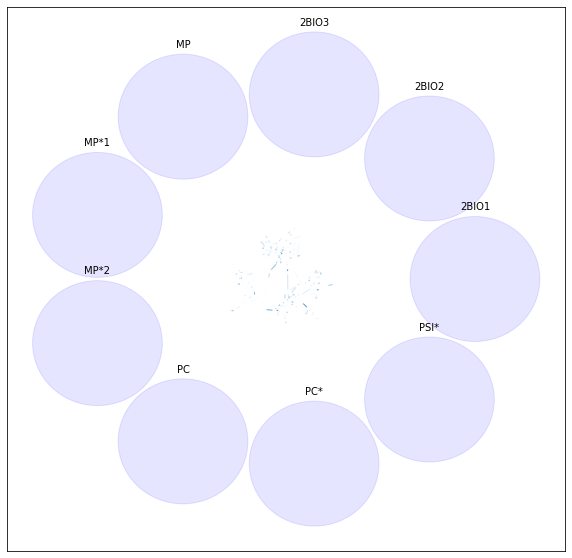

In [287]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

weights = np.log(weights)
weights = weights + -np.min(weights)
weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='white')

for i,c in enumerate(sorted(classes)):
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
        
    # draw the circles
    circ = plt.Circle(shift_v, 1, color='b', alpha=0.1)
    plt.text( shift_v[0], shift_v[1]+1.1, c, horizontalalignment='center' )
    ax.add_patch(circ)
    
plt.savefig('classes_diagram_limited.2.png', dpi=300)

# simpler 1st one...

In [143]:
wts = Counter([(u,v) for t,u,v in a.edgelist])
q8 = np.quantile( np.array(list(wts.values())), 0.8 )

In [164]:
G = nx.Graph()
G.add_nodes_from(gnodes)
G.add_weighted_edges_from([(u,v,w) for (u,v),w in wts.items() if w>=q8])
pos = nx.spectral_layout(G)

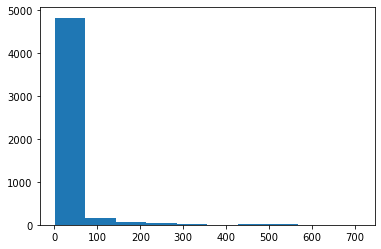

In [165]:
plt.hist( list(wts.values()) );

In [166]:
def doit(x):
    return x
    if x < 0:
        return -np.power(-x, 0.2)
    else: return np.power(x, 0.2)

In [167]:
pos_l = {
    k: [doit(v[0]), doit(v[1])]
    for k,v in pos.items()
}

In [168]:
CUTOFF = 0

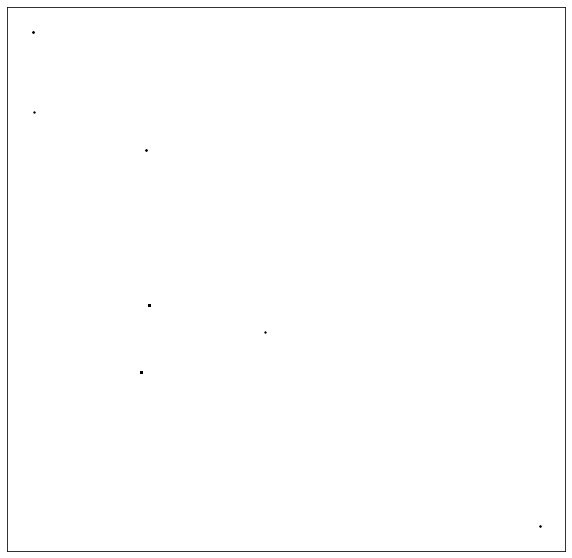

In [169]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos_l, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues, alpha=0.4)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos_l, node_size=1, node_color='black')
    
plt.savefig('classes_diagram_limited.1a.png', dpi=300)
if False:
    plt.xlim((-0.5, 0.5))
    plt.ylim((-0.5, 0.5))

    plt.xlim((
        min(x[0] for x in pos_l.values()),
        max(x[0] for x in pos_l.values())
    ))
    plt.ylim((
        min(x[1] for x in pos_l.values()),
        max(x[1] for x in pos_l.values())
    ))